# Introduction

Pittsburgh is celebrated for its distinctive diversity, charming character, and numerous bridges. Since its inception in the 18th century, it has evolved and changed into a one filled with great character and heart. In our project, we will explore the countless neighborhoods that make up Pittsburgh and determine the best one. To determine which neighborhood is the best, we have decided to analyze it through a fun, apocalyptic lens. Here, "best" is defined not just by traditional metrics of desirability but by a neighborhood’s capacity to provide safety and resources in a crisis situation. Metrics like population, safety, and availibility of resources will be what determines the best neighborhood.

# Metric 1: Population

The first metric that we are evaluating to determine which neighborhood is the best is population. In the apocalypse, the last place you want to be in is a heavily populated area. By being in an area occupied by a great number of people, resources are going to be difficult to find. That means the neighborhoods with smaller populations will be a lot more ideal.

# Dataset Preview

The data set we are working with regarding population is official census data from 2020. What this mean is that the numbers here are pretty reliable since every decade the government conducts a census and 2020 wasn't too long ago. Althought the numbers may not be spot on, they should be really close to the true population of Pittsburgh in 2024.

In [3]:
import pandas as pd
population = pd.read_csv("/home/jupyter-hth8/Data/populations.csv")
population.head(20)

,_id,Neighborhood,2010_Total_Population,2010_OneRace_Population,2010_White_Alone_Population,2010_Black_Alone_Population,2010_American_Indian_and_Alaska_Native_alone_population,2010_Asian_Alone_Population,2010_Native_Hawaiian_and_Other_Pacific_Islander_alone_Populatio,2010_Any_other_single_race_alone_Popualtion,...,Change_2010_to_2020_Total_Population,Change_2010_to_2020_OneRace_Population,Change_2010_to_2020_White_Alone_Population,Change_2010_to_2020_Black_Alone_Population,Change_2010_to_2020_American_Indian_and_Alaska_Native_alone_pop,Change_2010_to_2020_Asian_Alone_Population,Change_2010_to_2020_Native_Hawaiian_and_Other_Pacific_Islander_,Change_2010_to_2020_Any_other_single_race_alone_Popualtion,Change_2010_to_2020_Population_two_or_more_races,Change_2010_to_2020_Hispanic_or_Latino_Population
0,1,Allegheny Center,933,896,381,453,4,56,1,1,...,486,441,302,-63,4,179,0,19,45,23
1,2,Allegheny West,462,448,354,84,1,7,0,2,...,78,45,72,-52,0,9,1,15,33,28
2,3,Allentown,2500,2384,1485,878,9,1,0,11,...,-195,-258,-213,-93,-6,18,6,30,63,23
3,4,Arlington - Arlington Heights (Combined),2113,2042,1452,576,9,3,0,2,...,-73,-153,-246,44,-4,9,0,44,80,39
4,5,Banksville,4144,4053,3651,169,2,211,0,20,...,-17,-197,-460,25,5,174,2,57,180,102
5,6,Bedford Dwellings,1202,1166,48,1106,8,3,0,1,...,184,161,3,156,2,0,0,0,23,6
6,7,Beechview,7974,7763,6454,963,8,125,1,212,...,-378,-761,-997,-60,38,32,3,223,383,336
7,8,Beltzhoover,1925,1834,191,1604,11,3,2,23,...,-321,-374,-3,-424,-4,11,-2,48,53,53
8,9,Bloomfield,8442,8255,6886,739,11,542,3,74,...,223,-136,-123,-219,1,143,-2,64,359,192
9,10,Bluff,6600,6513,4345,2057,13,73,2,23,...,-718,-771,-752,-160,23,49,-2,71,53,170


As you can see, there is a whole of information here and most of these columns we don't need. The columns we are primarily looking for is population and neighborhood so we will have to filter everything out.

# Filtered and changed dataset

In [5]:
necessary = population[['Neighborhood', '2020_Total_Population']]
cleaned_data = necessary.dropna()
cleaned_data.head(20)

,Neighborhood,2020_Total_Population
0,Allegheny Center,1419
1,Allegheny West,540
2,Allentown,2305
3,Arlington - Arlington Heights (Combined),2040
4,Banksville,4127
5,Bedford Dwellings,1386
6,Beechview,7596
7,Beltzhoover,1604
8,Bloomfield,8665
9,Bluff,5882


Now that looks much better but still doesn't capture what we are looking for. This dataset is organized in alphabetical order based on neighbrhood and what we need is to organize it in relation to population (smallest to largest)

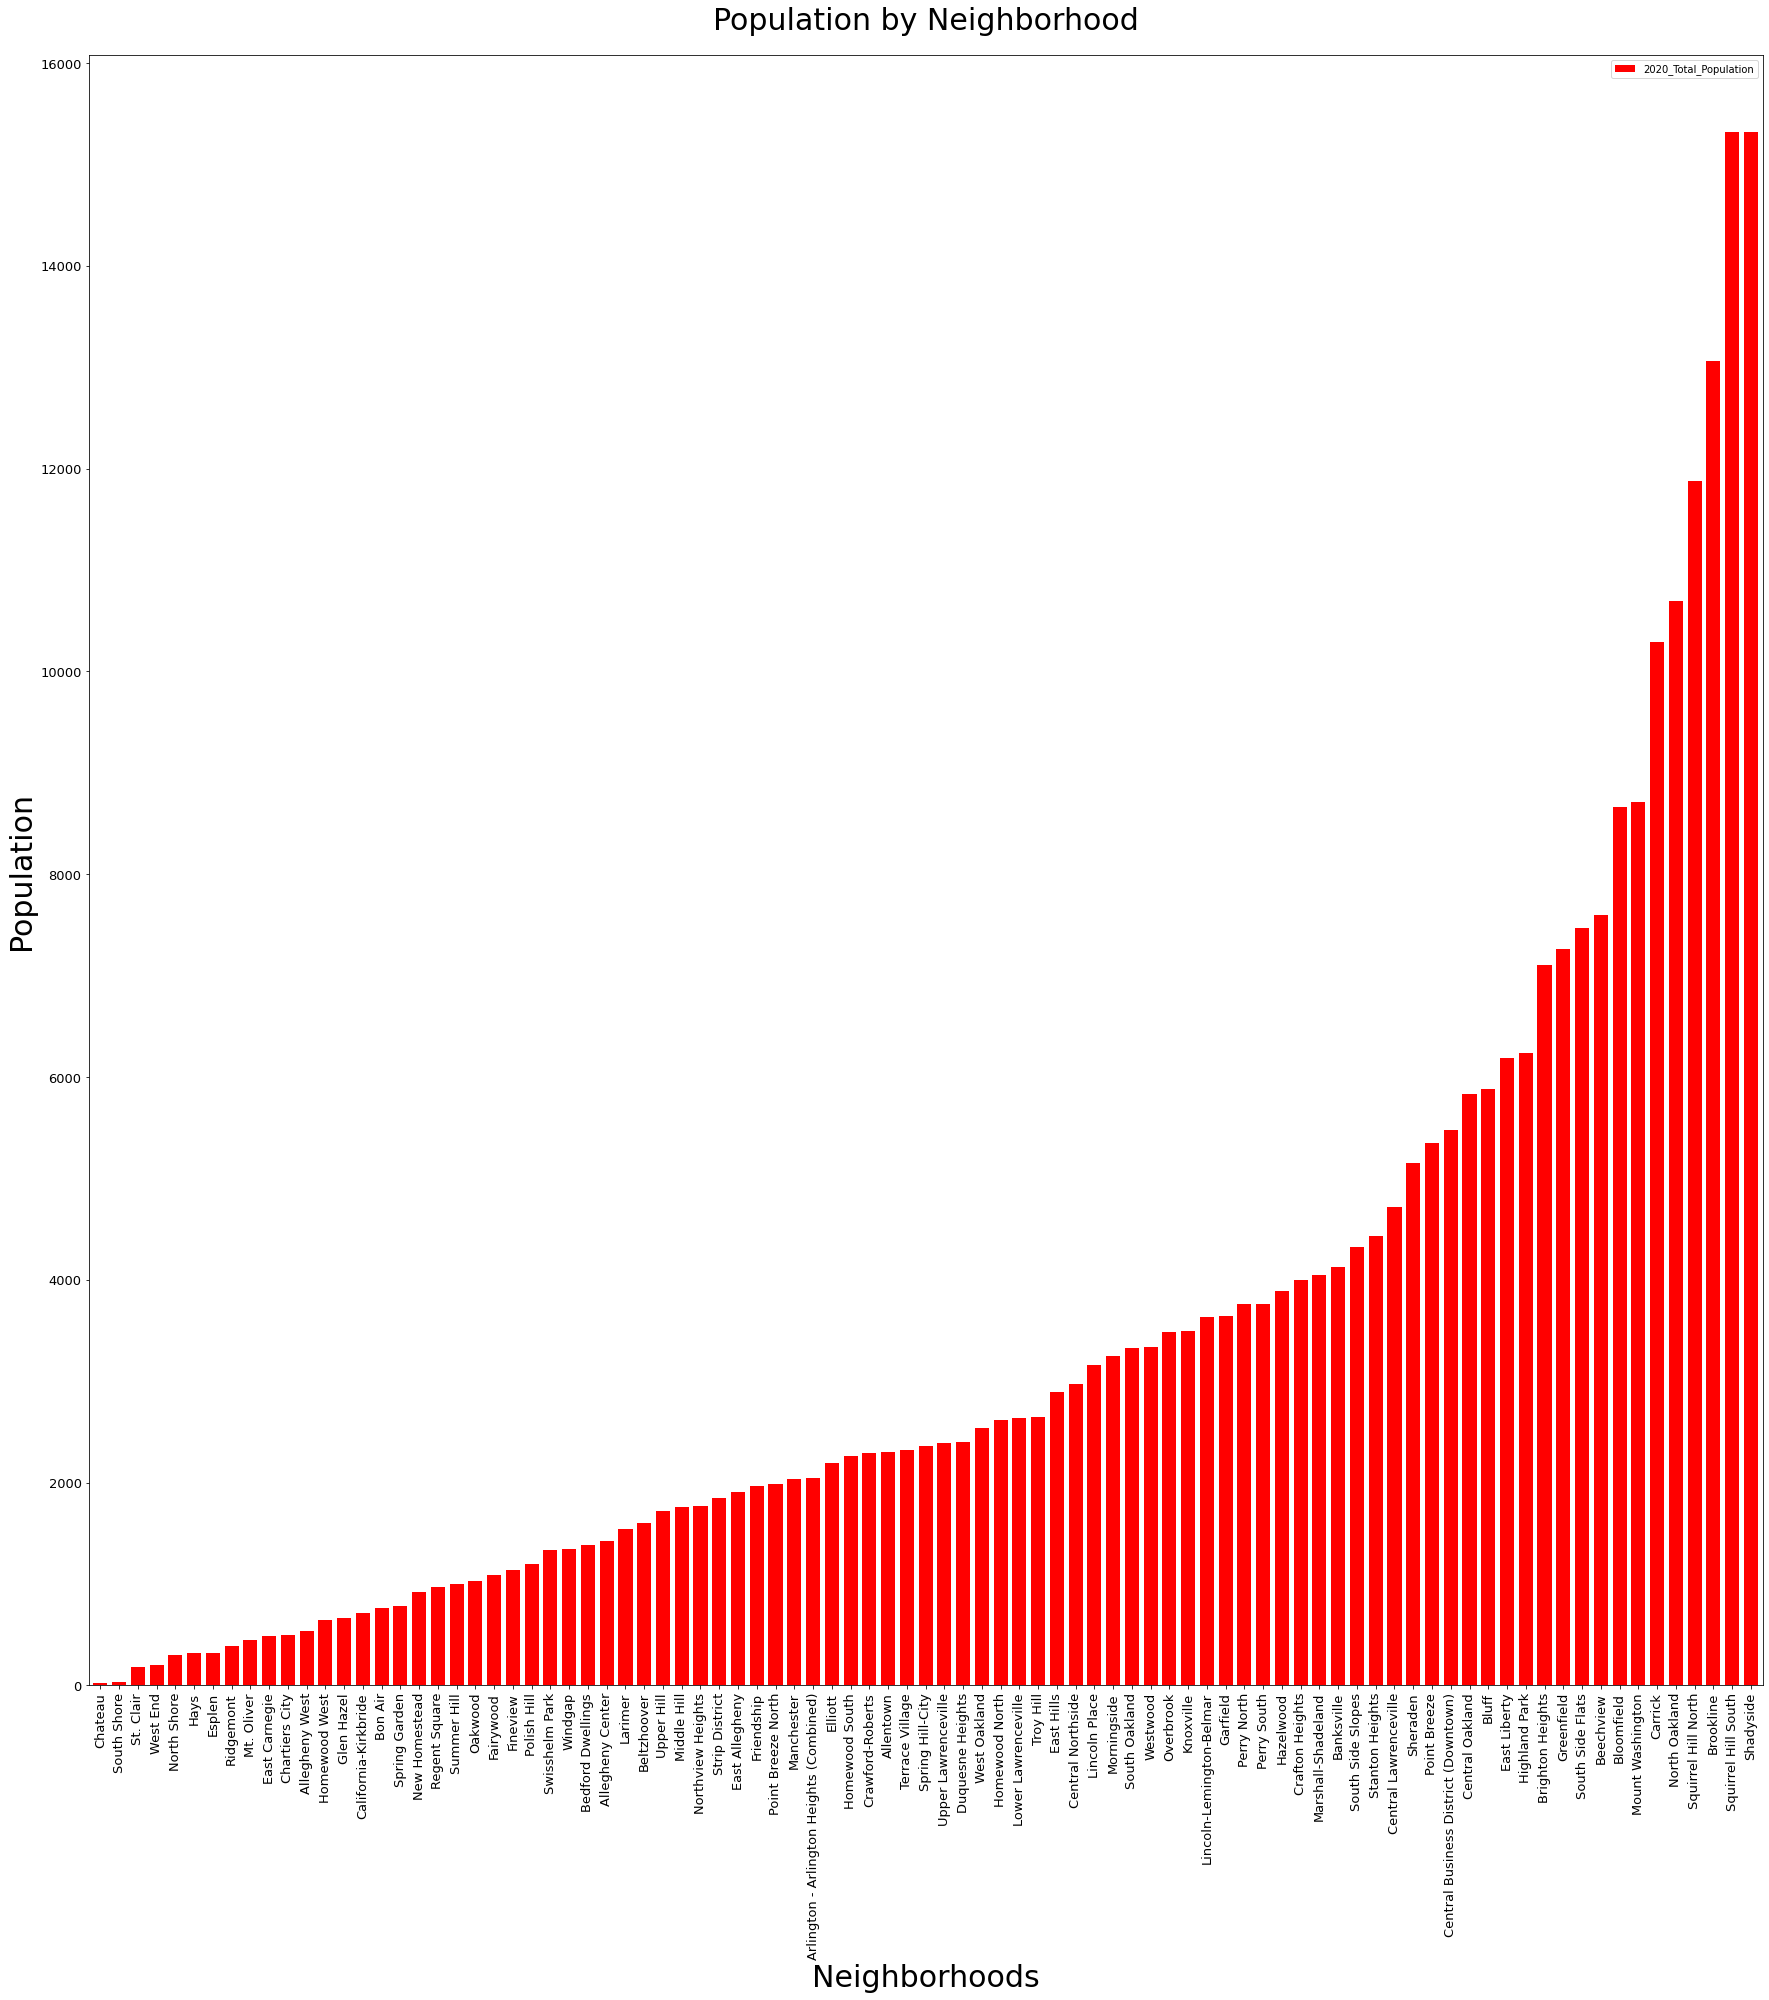

In [6]:
import matplotlib.pyplot as plt
data = cleaned_data.sort_values(by='2020_Total_Population', ascending=True)
data.set_index('Neighborhood', inplace=True)
plot = data.plot.bar(color = ['red'], width = .75, fontsize = 13, figsize = (30,30), rot = 90)
plt.xlabel(xlabel = 'Neighborhoods', fontsize = 30)
plt.ylabel(ylabel = 'Population', fontsize = 30)
plt.title(label = "Population by Neighborhood",fontsize = 30, pad = 25)
plt.show()

![alt text](https://media.giphy.com/media/gKfyusl0PRPdTNmwnD/giphy.gif "Logo Title Text 1")

So this is a lot to look at but it does provide a good look at the big picture. Instead of looking at a graph in its entirety, let us dive into the data more closely by analyzing both ends of the spectrum.

# Closer look: Least Populated

Based on our metrics, the least populated neighborhood should be the best neighborhood. Lets analyze what the least populated neighborhoods are...

In [7]:
data = cleaned_data.sort_values(by='2020_Total_Population', ascending=True)
data.head(10)

,Neighborhood,2020_Total_Population
20,Chateau,19
69,South Shore,29
76,St. Clair,183
85,West End,205
55,North Shore,301
36,Hays,321
29,Esplen,322
65,Ridgemont,390
52,Mt. Oliver,443
25,East Carnegie,491


<Figure size 1080x1080 with 0 Axes>

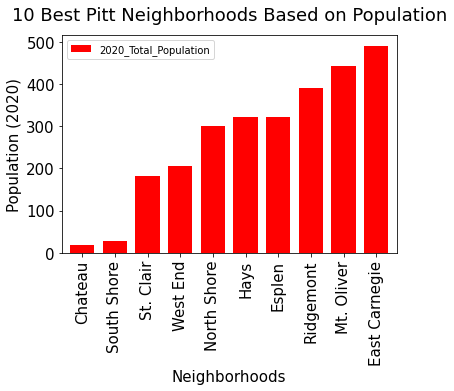

In [19]:
leastPopNeigh = data.head(10)
leastPopNeigh.set_index('Neighborhood', inplace=True)

plt.figure(figsize=(15, 15))  
first10 = leastPopNeigh.plot.bar(color=['red'], width=0.75, fontsize=15, rot=90)
plt.xlabel(xlabel='Neighborhoods', fontsize=15)
plt.ylabel(ylabel='Population (2020)', fontsize=15)
plt.title(label="10 Best Pitt Neighborhoods Based on Population", fontsize=18, pad=15)

plt.show()

With our metric in mind, the best neighborhood in relation to population is Chateau with a mighty 19 residents living in it! A close second is South Shore but after that, the neighborhoods have triple digit residents which is a whole other level compared to the two neighborhoods mentioned.

# Closer Look: Most Populated

Now that we have determined which neighborhood is the best in relation to population, lets look at what neighborhood is the worst!

In [13]:
data2 = cleaned_data.sort_values(by='2020_Total_Population', ascending=False)
data2.head(10)

,Neighborhood,2020_Total_Population
66,Shadyside,15317
75,Squirrel Hill South,15317
12,Brookline,13063
74,Squirrel Hill North,11879
54,North Oakland,10691
14,Carrick,10290
51,Mount Washington,8710
8,Bloomfield,8665
6,Beechview,7596
70,South Side Flats,7467


<Figure size 1080x1080 with 0 Axes>

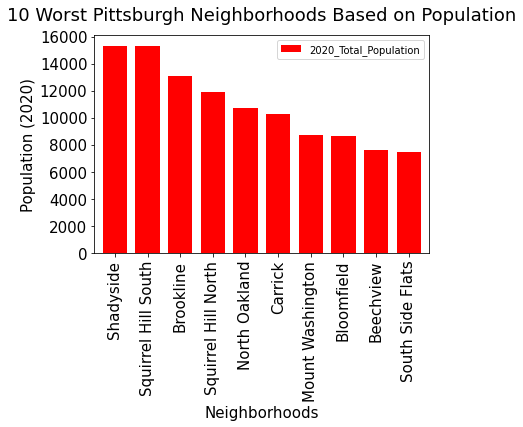

In [22]:
mostPopNeigh = data2.head(10)
mostPopNeigh.set_index('Neighborhood', inplace=True)

plt.figure(figsize=(15, 15))  
first10 = mostPopNeigh.plot.bar(color=['red'], width=0.75, fontsize=15, rot=90)
plt.xlabel(xlabel='Neighborhoods', fontsize=15)
plt.ylabel(ylabel='Population (2020)', fontsize=15)
plt.title(label="10 Worst Pittsburgh Neighborhoods Based on Population", fontsize=18, pad=15)

plt.show()

With our metric in mind, the worst neighborhood in relation to population is Shadyside with a whopping 15 thousand residents! It is safe to say if the apocalypse would happen, there would be a lot of competition going on there.

# Metric 2: Stores

The second metric that we decided to use to determine which neighborhood was the best is resources. After lots of data scraping and analysis, we decided to settle with supermarkets. This is because they have the most resources and because doing any other dataset like resturants was going to be a big pain.

# The Dataset

The dataset we used to find a list of supermarkets was the Allegheny County assets dataset. On this dataset, everything from affordable housing to schools was listed. Luckily, there was a subcategory for supermarkets and so we filted by that and downloaded the CSV file containing just the list of supermarkets. This dataset was created back in 2020 so just like the dataset for population, it was pretty up to date but not perfectly accurate.

In [26]:
import pandas as pd
markets = pd.read_csv("/home/jupyter-hth8/Data/markets.csv")
markets.head(20)

,_id,name,asset_type,tags,location_id,street_address,unit,unit_type,municipality,city,...,localizability,services,hard_to_count_population,data_source_names,data_source_urls,organization_name,organization_phone,organization_email,etl_notes,geocoding_properties
0,35612927,Giant Eagle #47 / Market District Robinson,supermarkets,NaN,84595,100 Settlers Ridge Center Drive,NaN,NaN,NaN,Pittsburgh,...,FIX,NaN,NaN,WPRDC Dataset: Allegheny County Restaurant/Foo...,https://data.wprdc.org/dataset/allegheny-count...,NaN,NaN,NaN,NaN,NaN
1,35629959,Dollar Tree #5553,supermarkets,NaN,84618,1630 Arlington Avenue,NaN,NaN,NaN,Pittsburgh,...,FIX,NaN,NaN,WPRDC Dataset: Allegheny County Restaurant/Foo...,https://data.wprdc.org/dataset/allegheny-count...,NaN,NaN,NaN,NaN,NaN
2,35629982,Costco #649,supermarkets,NaN,84578,501 W Waterfront Dr,NaN,NaN,NaN,Homestead,...,FIX,NaN,NaN,WPRDC Dataset: Allegheny County Restaurant/Foo...,https://data.wprdc.org/dataset/allegheny-count...,NaN,NaN,NaN,NaN,NaN
3,35630120,Donatelli's Italian Food Center,supermarkets,NaN,84524,4711 Liberty Avenue,NaN,NaN,NaN,Pittsburgh,...,FIX,NaN,NaN,WPRDC Dataset: Allegheny County Restaurant/Foo...,https://data.wprdc.org/dataset/allegheny-count...,NaN,NaN,NaN,NaN,NaN
4,35630149,East End Food Co-Op,supermarkets,NaN,84544,7516 Meade Street,NaN,NaN,NaN,Pittsburgh,...,FIX,NaN,NaN,WPRDC Dataset: Allegheny County Restaurant/Foo...,https://data.wprdc.org/dataset/allegheny-count...,NaN,NaN,NaN,NaN,NaN
5,35630175,Food Shoppe,supermarkets,NaN,84449,5878 Northumberland Street,NaN,NaN,NaN,Pittsburgh,...,FIX,NaN,NaN,WPRDC Dataset: Allegheny County Restaurant/Foo...,https://data.wprdc.org/dataset/allegheny-count...,NaN,NaN,NaN,NaN,NaN
6,35630235,Shop 'n Save,supermarkets,NaN,84632,4313 Walnut Street,NaN,NaN,NaN,Mc Keesport,...,FIX,NaN,NaN,WPRDC Dataset: Allegheny County Restaurant/Foo...,https://data.wprdc.org/dataset/allegheny-count...,NaN,NaN,NaN,NaN,NaN
7,35630258,Shop 'n Save,supermarkets,NaN,84620,5001 Library Road,NaN,NaN,NaN,Bethel Park,...,FIX,NaN,NaN,WPRDC Dataset: Allegheny County Restaurant/Foo...,https://data.wprdc.org/dataset/allegheny-count...,NaN,NaN,NaN,NaN,NaN
8,35630376,Community Market,supermarkets,NaN,84592,1710 Pacific Avenue,NaN,NaN,NaN,Natrona Heights,...,FIX,NaN,NaN,WPRDC Dataset: Allegheny County Restaurant/Foo...,https://data.wprdc.org/dataset/allegheny-count...,NaN,NaN,NaN,NaN,NaN
9,35630398,Bombay Market,supermarkets,NaN,84614,4605 Centre Avenue,NaN,NaN,NaN,Pittsburgh,...,FIX,NaN,NaN,WPRDC Dataset: Allegheny County Restaurant/Foo...,https://data.wprdc.org/dataset/allegheny-count...,NaN,NaN,NaN,NaN,NaN


Like the population dataset, we need to slim it down to only information we need. The only columns we need out of everything here is the name of the supermarket, the city its located in, and the coordinates (longitude, latitude). Since we are only analyzing Pittsburgh neighborhoods, we also have to filter out the supermarkets that are part of Allegheny County but aren't located in Pittsburgh.

# Filtering and changing the dataset (again!)

In [29]:
necessary2 = markets[['name', 'city', 'latitude', 'longitude']]
necessary2 = necessary2[(markets['city'] == 'Pittsburgh')]
filtered_mark= necessary2.dropna()
filtered_mark.head(20)

,name,city,latitude,longitude
0,Giant Eagle #47 / Market District Robinson,Pittsburgh,40.441638,-80.151349
1,Dollar Tree #5553,Pittsburgh,40.417361,-79.987416
3,Donatelli's Italian Food Center,Pittsburgh,40.462148,-79.949342
4,East End Food Co-Op,Pittsburgh,40.448304,-79.895701
5,Food Shoppe,Pittsburgh,40.441561,-79.920536
9,Bombay Market,Pittsburgh,40.452147,-79.951784
11,Costco #332,Pittsburgh,40.459513,-80.165225
13,Giant Eagle #25,Pittsburgh,40.516959,-80.038859
14,Fresh Thyme Farmer's Market #452,Pittsburgh,40.330197,-79.944082
15,Giant Eagle #45,Pittsburgh,40.584386,-80.038153


# Location Previewing

Trying to view which supermarket was located in which neighborhood was the hardest part of this project. On the CSV file, there is no category listing which neighborhood each market was located at and there was hundreds of markets. To spend the time to search each market up and take note on which neighborhood they resided in was too inefficient so we had to come up with another way of doing that. Luckily on the CSV file, the coordinated for each market was listed. This meant we could import a map of Pittsburgh and place a marker of where each market was based on those coordinates so we did just that... 

In [10]:
import folium
import pandas as pd

data = pd.read_csv('/home/jupyter-hth8/Data/markets.csv')
filtered_data = data[(data['city'] == 'Pittsburgh')]
filtered_data = filtered_data.dropna(subset=['latitude', 'longitude'])

map = folium.Map(location=[filtered_data['latitude'].mean(), filtered_data['longitude'].mean()], zoom_start=12)
for index, row in filtered_data.iterrows():
    folium.Marker([row['latitude'], row['longitude']], popup=row['name']).add_to(map)
map

The problem with this preview is that the neighborhoods aren't shown. Although we know where each supermarket is located in relation to the city of Pittsburgh, we do not know in relation to the neighborhoods of Pittsburgh. This took us a while to figure out but eventually, we found a way to indicate where each neighborhood was. Using additional libraries such as geopandas and a shapefile of the Pittsburgh neighborhoods, we were able to overlay both the supermarkets and the Pittsburgh neighborhoods on one single map!

In [5]:
import geopandas as gpd
import folium

# Load the shapefile
gdf = gpd.read_file('/home/jupyter-hth8/Data/Neighborhoods_.shp')

# Reproject to UTM (for example, EPSG:32617 for Pittsburgh)
gdf_projected = gdf.to_crs(epsg=32617)
gdf_projected['Area'] = gdf_projected['geometry'].area

gdf = gdf_projected.to_crs(epsg=4326)

# Center the map around Pittsburgh
map_center = [40.4406, -79.9959]
m = folium.Map(location=map_center, zoom_start=12)

# Add the GeoDataFrame as GeoJson
folium.GeoJson(
    gdf,
    name='Pittsburgh Neighborhoods',
    tooltip=folium.GeoJsonTooltip(fields=['hood', 'Area'], aliases=['Neighborhood:', 'Area (sq meters):']),
    style_function=lambda x: {'fillColor': 'blue', 'color': 'black', 'weight': 0.5}
).add_to(m)

# Load CSV file
data = pd.read_csv('/home/jupyter-hth8/Data/markets.csv')
filtered_data = data[(data['city'] == 'Pittsburgh')]
filtered_data.head(100)

filtered_data = filtered_data.dropna(subset=['latitude', 'longitude'])
for index, row in filtered_data.iterrows():
    folium.Marker([row['latitude'], row['longitude']], popup=row['name']).add_to(m)

# Display the map
m

# Analysis

Based on the map, we can see how much of a food desert Pittsburgh really is. Of course there are resturants and other buildings that contain food but the existence of supermarkets is few and far between. From what we have gathered, the neighborhoods with the most concentration of supermarkets is East Liberty/Shadyside and Strip District. What this means is that in an apocalyptic scenario, you best neighborhood for you to be in for food and resources is Shadyside, East Liberty, and Strip District. The best of these three is without a doubt Strip District since East Liberty and Shadyside (based on the map) border each other and share those supermarkets.

# Conclusion

Will: After taking a look at everything from crime rate to resources to population the best neighborhood is Strip District  without a doubt. Based on my side of the work, the population of strip district is no where near the top neighborhoods. With a little under 2000 people living in the Strip District, it is the perfect neighborhood to be in during the apocalypse. In addition to that, the Strip district has a lot of supermarkets as seen on the map. When dividing the population with how many supermarkets are located in the Strip District, we see that each person would only be competing with 500 other people per supermarket. This is really good compared to everywhere else with supermarkets. To top it all off, based on Ziqi's statistics, Strip District doesn't have a lot of crime. So when the apocalypse breaks out, it would be a lot